Task 1: Time Series Analysis

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


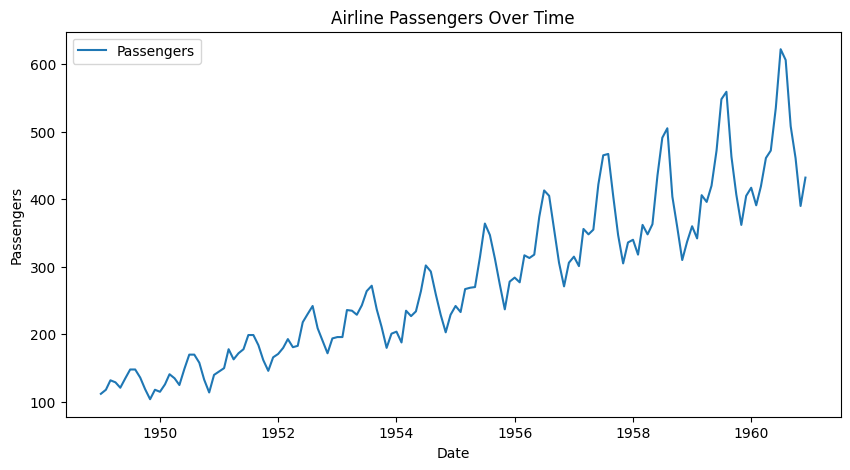

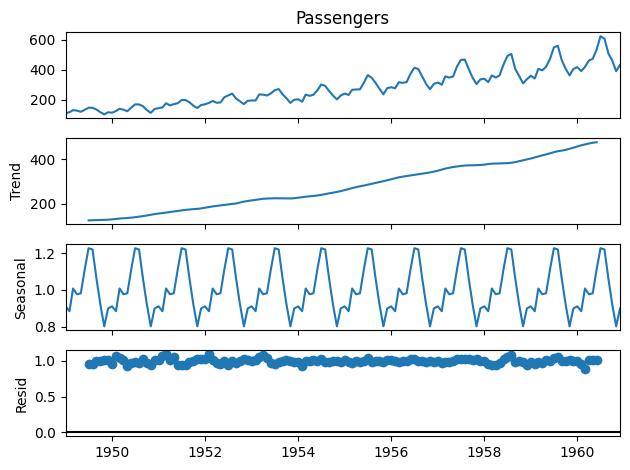

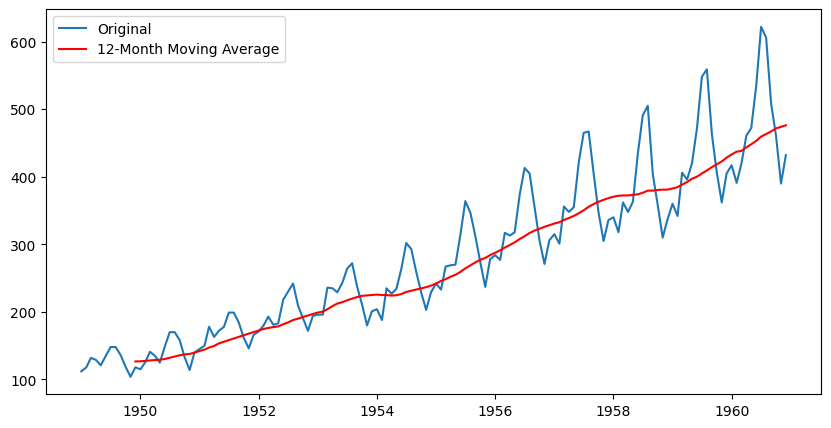

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


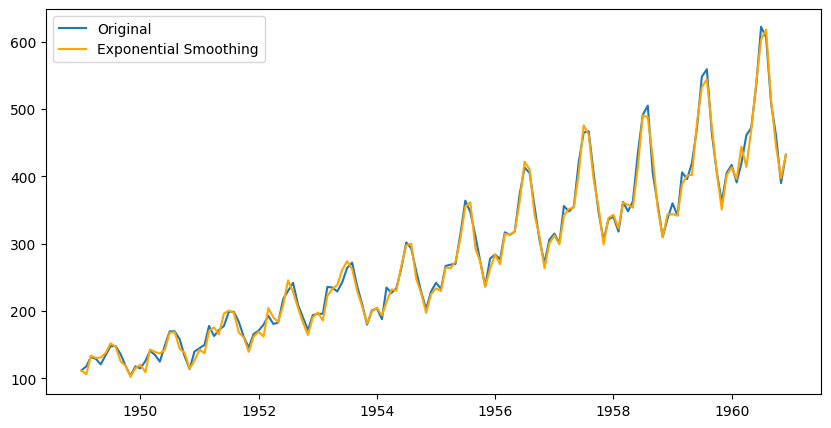

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  115
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -523.758
Date:                Wed, 24 Sep 2025   AIC                           1057.516
Time:                        04:44:47   BIC                           1071.197
Sample:                    01-01-1949   HQIC                          1063.069
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3280      0.145      2.268      0.023       0.045       0.611
ar.L2          0.2521      0.165      1.528      0.126      -0.071       0.575
ma.L1         -0.0125      0.109     -0.114      0.9

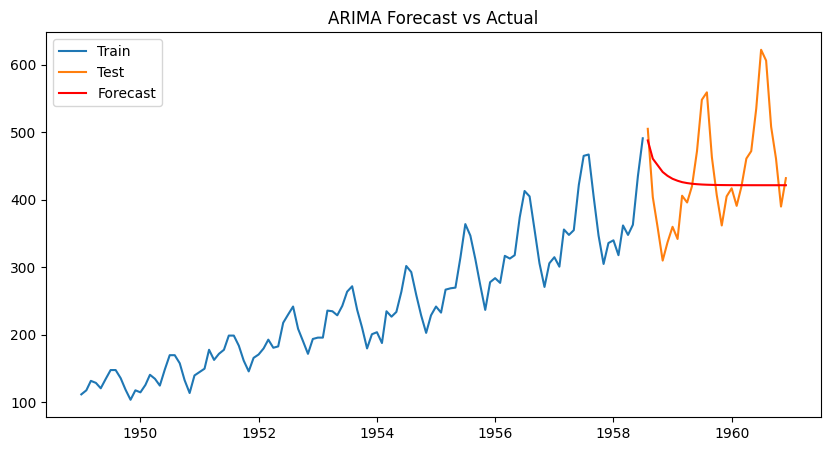

In [1]:
# task4_timeseries.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import math

# -----------------------------
# 1. Load dataset
# -----------------------------
# Example: Airline passengers dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

print(df.head())

# -----------------------------
# 2. Plot the series
# -----------------------------
plt.figure(figsize=(10, 5))
plt.plot(df, label="Passengers")
plt.title("Airline Passengers Over Time")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.show()

# -----------------------------
# 3. Decomposition
# -----------------------------
result = seasonal_decompose(df['Passengers'], model='multiplicative', period=12)
result.plot()
plt.show()

# -----------------------------
# 4. Moving Average Smoothing
# -----------------------------
df['MA_12'] = df['Passengers'].rolling(window=12).mean()

plt.figure(figsize=(10, 5))
plt.plot(df['Passengers'], label="Original")
plt.plot(df['MA_12'], label="12-Month Moving Average", color='red')
plt.legend()
plt.show()

# -----------------------------
# 5. Exponential Smoothing
# -----------------------------
exp_model = ExponentialSmoothing(df['Passengers'], seasonal='mul', seasonal_periods=12)
exp_fit = exp_model.fit()
df['Exp_Smooth'] = exp_fit.fittedvalues

plt.figure(figsize=(10, 5))
plt.plot(df['Passengers'], label="Original")
plt.plot(df['Exp_Smooth'], label="Exponential Smoothing", color='orange')
plt.legend()
plt.show()

# -----------------------------
# 6. Train-Test Split
# -----------------------------
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# -----------------------------
# 7. ARIMA Model
# -----------------------------
model = ARIMA(train['Passengers'], order=(2,1,2))  # (p,d,q) - tweak if needed
model_fit = model.fit()
print(model_fit.summary())

# Forecast
forecast = model_fit.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

# -----------------------------
# 8. Evaluation
# -----------------------------
rmse = math.sqrt(mean_squared_error(test['Passengers'], forecast))
print(f"ARIMA RMSE: {rmse:.2f}")

# -----------------------------
# 9. Visualization
# -----------------------------
plt.figure(figsize=(10, 5))
plt.plot(train['Passengers'], label="Train")
plt.plot(test['Passengers'], label="Test")
plt.plot(forecast, label="Forecast", color='red')
plt.title("ARIMA Forecast vs Actual")
plt.legend()
plt.show()


Task 2: Natural Language
 Processing (NLP) - Text
 Classification

Columns: Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')
                                                Text Sentiment
0   Enjoying a beautiful day at the park!        ...  Positive
1   Traffic was terrible this morning.           ...  Negative
2   Just finished an amazing workout! 💪          ...  Positive
3   Excited about the upcoming weekend getaway!  ...  Positive
4   Trying out a new recipe for dinner tonight.  ...   Neutral
                                                Text  \
0   Enjoying a beautiful day at the park!        ...   
1   Traffic was terrible this morning.           ...   
2   Just finished an amazing workout! 💪          ...   
3   Excited about the upcoming weekend getaway!  ...   
4   Trying out a new recipe for dinner tonight.  ...   

                         clean_text  
0       enjoying beautiful day par

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined an

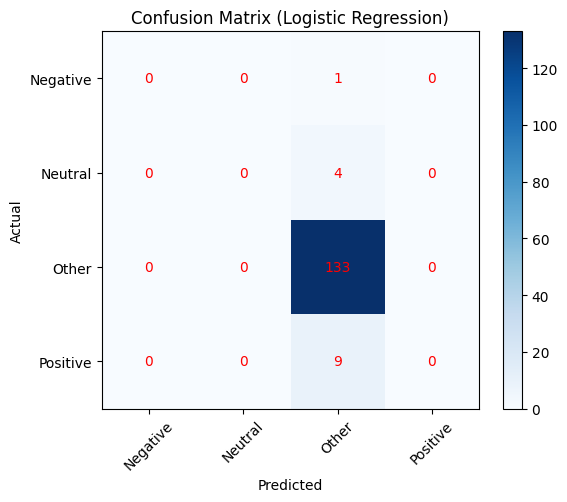

In [13]:
# task5_text_classification.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# -----------------------------
# 1. Load Dataset
# -----------------------------
# Example: sentiment dataset (text, label)
df = pd.read_csv("Sentiment dataset.csv")

# Strip whitespace and unify labels
df['Sentiment'] = df['Sentiment'].astype(str).str.strip()

# Optionally, keep only main sentiment categories
main_labels = ['Positive', 'Negative', 'Neutral']
df['Sentiment'] = df['Sentiment'].apply(lambda x: x if x in main_labels else 'Other')

print("Columns:", df.columns)
print(df[['Text', 'Sentiment']].head())

# -----------------------------
# 2. Preprocessing Functions
# -----------------------------
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['Text'].apply(preprocess_text)
print(df[['Text', 'clean_text']].head())

# -----------------------------
# 3. Train-Test Split
# -----------------------------
le = LabelEncoder()
df['Sentiment_encoded'] = le.fit_transform(df['Sentiment'])

X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['Sentiment_encoded'],
    test_size=0.2, random_state=42, stratify=df['Sentiment_encoded']
)

# -----------------------------
# 4. TF-IDF Vectorization
# -----------------------------
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# -----------------------------
# 5. Model Training
# -----------------------------
# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_preds = nb_model.predict(X_test_tfidf)

# Logistic Regression
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train_tfidf, y_train)
lr_preds = lr_model.predict(X_test_tfidf)

# -----------------------------
# 6. Evaluation
# -----------------------------
print("=== Naive Bayes Report ===")
print(classification_report(y_test, nb_preds, target_names=le.classes_))

print("=== Logistic Regression Report ===")
print(classification_report(y_test, lr_preds, target_names=le.classes_))

# -----------------------------
# 7. Confusion Matrix (Logistic Regression)
# -----------------------------
cm = confusion_matrix(y_test, lr_preds)
plt.figure(figsize=(6,5))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix (Logistic Regression)")
plt.colorbar()
plt.xticks(np.arange(len(le.classes_)), le.classes_, rotation=45)
plt.yticks(np.arange(len(le.classes_)), le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Annotate cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i,j], ha='center', va='center', color='red')

plt.tight_layout()
plt.show()


Task 3: Neural Networks with
 TensorFlow/Keras

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28) (60000, 10)
Test data shape: (10000, 28, 28) (10000, 10)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
750/750 - 4s - 6ms/step - accuracy: 0.9129 - loss: 0.2992 - val_accuracy: 0.9541 - val_loss: 0.1530
Epoch 2/15
750/750 - 5s - 6ms/step - accuracy: 0.9629 - loss: 0.1244 - val_accuracy: 0.9672 - val_loss: 0.1126
Epoch 3/15
750/750 - 3s - 4ms/step - accuracy: 0.9744 - loss: 0.0835 - val_accuracy: 0.9714 - val_loss: 0.0944
Epoch 4/15
750/750 - 3s - 4ms/step - accuracy: 0.9803 - loss: 0.0619 - val_accuracy: 0.9723 - val_loss: 0.0889
Epoch 5/15
750/750 - 3s - 4ms/step - accuracy: 0.9852 - loss: 0.0481 - val_accuracy: 0.9755 - val_loss: 0.0863
Epoch 6/15
750/750 - 4s - 5ms/step - accuracy: 0.9874 - loss: 0.0396 - val_accuracy: 0.9734 - val_loss: 0.0980
Epoch 7/15
750/750 - 4s - 5ms/step - accuracy: 0.9906 - loss: 0.0288 - val_accuracy: 0.9747 - val_loss: 0.0938
Epoch 8/15
750/750 - 3s - 4ms/step - accuracy: 0.9921 - loss: 0.0259 - val_accuracy: 0.9753 - val_loss: 0.0951
Epoch 9/15
750/750 - 6s - 8ms/step - accuracy: 0.9928 - loss: 0.0223 - val_accuracy: 0.9718 - val_loss: 0.1085
E

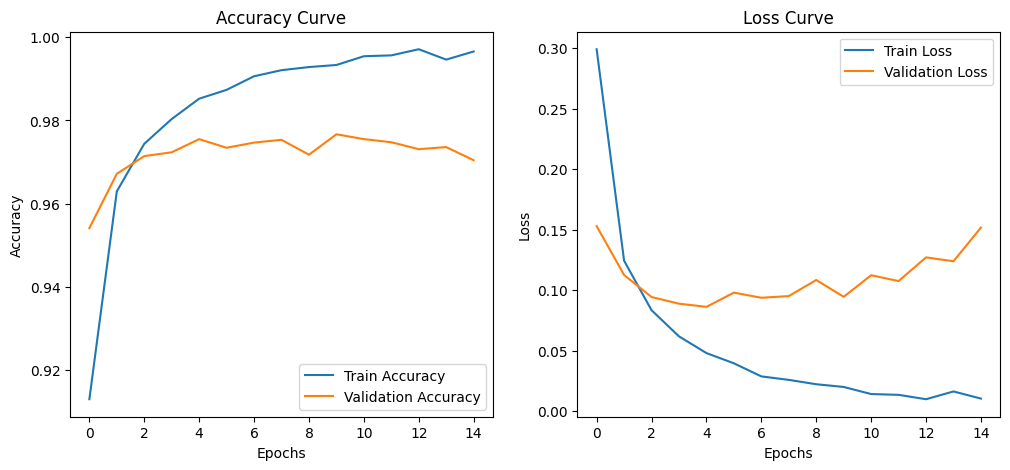

In [14]:
# task6_ffnn_classification.py

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


# MNIST dataset: 28x28 grayscale images of digits 0-9
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to [0,1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("Training data shape:", X_train.shape, y_train_cat.shape)
print("Test data shape:", X_test.shape, y_test_cat.shape)

# -----------------------------
# 2. Build Feed-Forward Neural Network
# -----------------------------
model = Sequential([
    Flatten(input_shape=(28,28)),          # Flatten 28x28 image to 784 vector
    Dense(128, activation='relu'),         # Hidden layer with 128 neurons
    Dense(64, activation='relu'),          # Hidden layer with 64 neurons
    Dense(10, activation='softmax')        # Output layer for 10 classes
])

# -----------------------------
# 3. Compile the Model
# -----------------------------
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# -----------------------------
# 4. Train the Model
# -----------------------------
history = model.fit(
    X_train, y_train_cat,
    validation_split=0.2,
    epochs=15,
    batch_size=64,
    verbose=2
)

# -----------------------------
# 5. Evaluate the Model
# -----------------------------
loss, accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}, Test Loss: {loss:.4f}")

# -----------------------------
# 6. Plot Accuracy & Loss Curves
# -----------------------------
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
